In [1]:
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

model = models.Sequential()

model.add(layers.Conv2D(
    32, 
    (3, 3),                               # subset of the picture; this is moved around the picture. As the
    activation="relu",                    # subset is 3x3, we have only 26 ways how it can be moved on an axis
    input_shape=(28, 28, 1)               # the 1 stands for the color depth (grayscale = 1, RGB would be 3).
))                                        # the convolution is a 'NN inside a NN' ()

model.add(layers.MaxPooling2D((2, 2)))    # takes the maximum for a given 3x3 picture
model.add(layers.Conv2D(64, (3, 3), activation="relu"))   # ...
model.add(layers.MaxPooling2D((2, 2)))                    # ...
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

C:\Users\Christian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [2]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Train: (60000, 28, 28)
Test: (10000, 28, 28)


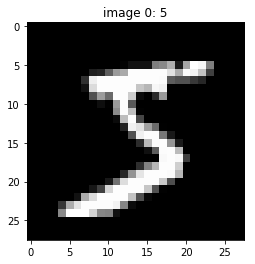

Before: 5
After: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Train:", train_images.shape)
print("Test:", test_images.shape)

for i in range(1):
    plt.imshow(train_images[i], cmap="gray")
    plt.title("image " + str(i) + ": " + str(train_labels[i]))
    plt.show()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255.0

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255.0

print("Before:", train_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("After:", train_labels[0])

In [ ]:
history = model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size=64
)

Epoch 1/5
14528/60000 [======>.......................] - ETA: 23:50 - loss: 0.4825 - acc: 0.8468

In [ ]:
r = range(1, len(history.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history.history["acc"], label="acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history.history["loss"], label="loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\nLoss / Accuracy Evaluation")
print("--------------------------")
print("Loss:     " + str(round(test_loss,5)))
print("Accuracy: " + str(round(test_acc,2)))

Convolutions take very long; we can use transfer learning though where we just train the layers _after_ the convolution layers. These were already trained by e.g. Google and can detect things like edges.